In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:

dataset_train = pd.read_csv('AAPL.csv')
training_set = dataset_train.iloc[:, 1:2].values

In [3]:
dataset_train.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-29,100.589996,100.690002,98.040001,99.620003,93.514290,142718700
1,2014-10-06,99.949997,102.379997,98.309998,100.730003,94.556244,280258200
2,2014-10-13,101.330002,101.779999,95.180000,97.669998,91.683792,358539800
3,2014-10-20,98.320000,105.489998,98.220001,105.220001,98.771042,358532900
4,2014-10-27,104.849998,108.040001,104.699997,108.000000,101.380676,220230600


In [4]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)

X_train = []
y_train = []
for i in range(60, 1159):
  X_train.append(training_set_scaled[i-60:i, 0])
  y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))


In [ ]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense

In [ ]:
model = Sequential()

model.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50))
model.add(Dropout(0.2))

model.add(Dense(units=1))

model.compile(optimizer='adam',loss='mean_squared_error')

model.fit(X_train,y_train,epochs=100,batch_size=32)

Epoch 1/100
35/35 [==============================] - 10s 108ms/step - loss: 0.0245
Epoch 2/100
35/35 [==============================] - 4s 106ms/step - loss: 0.0049
Epoch 3/100
35/35 [==============================] - 4s 108ms/step - loss: 0.0039
Epoch 4/100
35/35 [==============================] - 4s 108ms/step - loss: 0.0035
Epoch 5/100
35/35 [==============================] - 4s 108ms/step - loss: 0.0034
Epoch 6/100
35/35 [==============================] - 4s 108ms/step - loss: 0.0028
Epoch 7/100
35/35 [==============================] - 4s 108ms/step - loss: 0.0030
Epoch 8/100
35/35 [==============================] - 4s 108ms/step - loss: 0.0029
Epoch 9/100
35/35 [==============================] - 4s 107ms/step - loss: 0.0033
Epoch 10/100
35/35 [==============================] - 4s 107ms/step - loss: 0.0027
Epoch 11/100
35/35 [==============================] - 4s 107ms/step - loss: 0.0026
Epoch 12/100
35/35 [==============================] - 4s 107ms/step - loss: 0.0025
Epoch 13/100

In [ ]:
dataset_test = pd.read_csv('AAPL_test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

In [ ]:
dataset_total = pd.concat((dataset_train['open'], dataset_test['open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 76):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

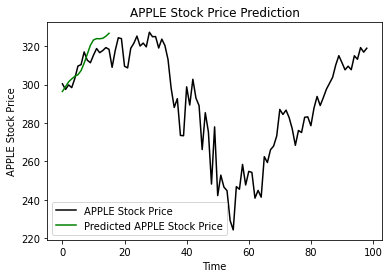

In [ ]:
plt.plot(real_stock_price, color = 'black', label = 'APPLE Stock Price')
plt.plot(predicted_stock_price, color = 'green', label = 'Predicted APPLE Stock Price')
plt.title('APPLE Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('APPLE Stock Price')
plt.legend()
plt.show()